<a href="https://colab.research.google.com/github/Rizqanziyan/TugasPiton11/blob/main/Python11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [18]:
ls

'1101180388_Rizqan Ziyan Dafin_TT-42-02.pdf'
'2 nik.java'
 3scene@
 Classroom/
 daun@
 daun.jpg
'Getting started.pdf'
 image/
 imageclassificationmodel/
'KSM Semester 5 Rizqan.pdf'
'Kuis dan Tugas PSWD_1101180388_Rizqan Ziyan Dafin.pdf'
'LH_GELADI2020_1_1101180388_Rizqan Ziyan Dafin.pdf'
 NIK.java
'no 3.java'
 Parkir.java
 RizqanZiyan_1101180388_probstat1.pdf
'Rizqan Ziyan Dafin_1101180388_TT-42-02_UTS SKO.pdf'
 Screenshot_2020-09-12-18-22-30-02.png
 test.jpg


In [19]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [20]:
print("[INFO] loading images...")
imagePaths = paths.list_images("daun")
data = []
labels = []

[INFO] loading images...


In [21]:
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
	image = np.array(image.resize((32, 32))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [22]:
print(labels)

['GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03',

In [23]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [24]:
print(labels)

[[0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 ...
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]]


In [25]:
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25)
print(trainX.shape)
print(testX.shape)

(438, 32, 32, 3)
(146, 32, 32, 3)


In [26]:
from keras.layers import Convolution2D, MaxPooling2D, MaxPool2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(8, (3,3), activation='relu', input_shape=(32,32,3)))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(16, (3,3), activation='relu'))
model1.add(MaxPool2D(2,2))
#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 8)         224       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 16)        1168      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               57700     
_________________________________________________________________
dense_3 (Dense)              (None, 5)                

In [27]:
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [28]:
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=50, batch_size=32)

Epoch 1/50
14/14 [==============================] - 0s 12ms/step - loss: 1.5966 - accuracy: 0.2580 - val_loss: 1.5627 - val_accuracy: 0.2192
Epoch 2/50
14/14 [==============================] - 0s 4ms/step - loss: 1.5194 - accuracy: 0.3630 - val_loss: 1.4509 - val_accuracy: 0.4521
Epoch 3/50
14/14 [==============================] - 0s 4ms/step - loss: 1.3906 - accuracy: 0.4452 - val_loss: 1.3259 - val_accuracy: 0.5068
Epoch 4/50
14/14 [==============================] - 0s 4ms/step - loss: 1.3172 - accuracy: 0.4703 - val_loss: 1.2504 - val_accuracy: 0.5274
Epoch 5/50
14/14 [==============================] - 0s 4ms/step - loss: 1.1880 - accuracy: 0.5228 - val_loss: 1.1945 - val_accuracy: 0.5479
Epoch 6/50
14/14 [==============================] - 0s 4ms/step - loss: 1.1135 - accuracy: 0.5502 - val_loss: 1.1347 - val_accuracy: 0.5548
Epoch 7/50
14/14 [==============================] - 0s 4ms/step - loss: 1.0631 - accuracy: 0.5753 - val_loss: 1.0553 - val_accuracy: 0.6027
Epoch 8/50
14/14 [=

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


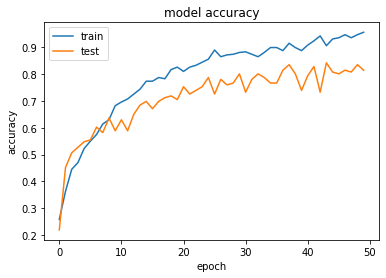

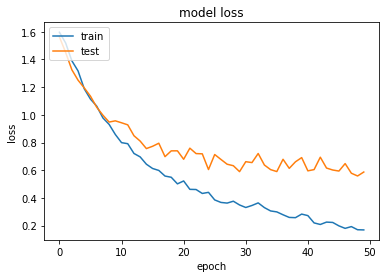

In [29]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [30]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.77      0.74      0.75        31
      GMB_02       0.84      0.72      0.78        29
      GMB_03       0.90      0.93      0.92        30
      GMB_04       0.74      0.74      0.74        23
      GMB_05       0.81      0.91      0.86        33

    accuracy                           0.82       146
   macro avg       0.81      0.81      0.81       146
weighted avg       0.81      0.82      0.81       146



In [33]:
model1.save('nnmodel_scene')

INFO:tensorflow:Assets written to: nnmodel_scene/assets


In [34]:
import cv2
import matplotlib.pyplot as plt
image1='daun.jpg'

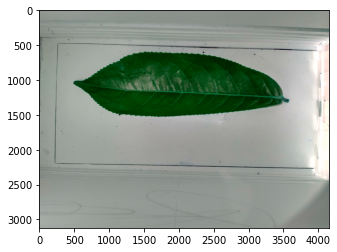

In [35]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))

In [36]:
image_testing = Image.open('daun.jpg')
image_testing = np.array(image_testing.resize((32, 32))) / 255.0
image_testing.shape

(32, 32, 3)

In [37]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 32, 32, 3)


In [38]:
output = model1.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[1.42204415e-10 1.43204443e-06 9.99998212e-01 3.29483925e-07
  1.02630945e-10]]
['GMB_03']
